In [2]:
import random
import math
import json
import argparse
import matplotlib.pyplot as plt
import os

In [3]:
class Brick:
    def __init__(self, x, y, z, label='None', shape='None', color = 'None'):
        self.x = x
        self.y = y
        self.z = z
        self.label = label
        self.shape = shape
        self.color = color
    def __str__(self):
        x = self.x
        res = 'Brick at ({}, {}, {}, {}, {}, {})'.format(self.x, self.y, self.z, self.label, self.shape, self.color)
        return res
    
    def get_position_description(self, bricks):
        #print(len(bricks))
        for item in bricks:
            if item.x == self.x and item.y == self.y and abs(item.z - self.z)==1:
                prev_brick = item
                break
            elif item.x == self.x and item.z == self.z and abs(item.y - self.y)==1:
                prev_brick = item
                break
            elif item.y == self.y and item.z == self.z and abs(item.x - self.x)==1:
                prev_brick = item
                break
            else:
                continue
        x_diff = self.x - prev_brick.x
        y_diff = self.y - prev_brick.y
        z_diff = self.z - prev_brick.z

        if x_diff == 0 and y_diff == 0 and z_diff == 1:
            return "The brick {} is on top of the brick {} . ".format(self.label, prev_brick.label)
        elif x_diff == 0 and y_diff == 0 and z_diff == -1:
            return "The brick {} is below the brick {}. ".format(self.label, prev_brick.label)
        elif x_diff == 0 and y_diff == 1 and z_diff == 0:
            return "The brick {} is to the right of the brick {}. ".format(self.label, prev_brick.label)
        elif x_diff == 0 and y_diff == -1 and z_diff == 0:
            return "The brick {} is to the left of the brick {}. ".format(self.label, prev_brick.label)
        elif x_diff == 1 and y_diff == 0 and z_diff == 0:
            return "The brick {} is in front of the brick {}. ".format(self.label, prev_brick.label)
        elif x_diff == -1 and y_diff == 0 and z_diff == 0:
            return "The brick {} is behind the brick {}. ".format(self.label, prev_brick.label)
        else:
            return "next to the previous brick, but not in any particular direction"


def distance(a, b):
    return math.sqrt((a.x - b.x)**2 + (a.y - b.y)**2 + (a.z - b.z)**2)

def find_nearest_bricks(bricks, target, target_color="white"):
    min_distance = float('inf')
    nearest_brick = None

    for brick in bricks:
        if brick.color == target_color:
            dist = distance(brick, target)
            
            if dist < min_distance:
                min_distance = dist
                nearest_brick = brick
    # print("The nearest {} object of brick {} is {}".format(target_color, target.label, nearest_brick.label ))
    return nearest_brick

def find_farthest_bricks(bricks, target, target_color="white"):
    max_distance = float('-inf')
    farthest_brick = None

    for brick in bricks:
        if brick.color == target_color:
            dist = distance(brick, target)
            if dist > max_distance:
                min_distance = dist
                farthest_brick = brick
    # print("The farthest {} object of brick {} is {}".format(target_color, target.label, farthest_brick.label ))
    return farthest_brick

def build_bricks(n, m, height, shuffle):
    flag = 65
    bricks=[]
    colors = ['blue', 'yellow', 'white']
    shapes = ['triangle', 'square']
    # shapes = ['square']
    all_nums = 26
    label_list = [chr(i+flag) for i in range(all_nums)]

    for i in range(n):
        for j in range(m):
            index = random.randint(0, 2)
            color = colors[index]
            shape = shapes[1] # default shape to square
            if shuffle:
                random_element = random.choice(label_list)
                label_list.remove(random_element)
            else:
                random_element = chr(flag)
            bricks.append(Brick(i, j, 0, random_element, shape, color ) )
            flag+=1

    num_bricks = random.randint(5, 26)
    while len(bricks) < num_bricks:
        y = random.randint(0, m-1)
        # Find the maximum z value at this y coordinate
        max_z = max([brick.z for brick in bricks if brick.y == y], default=-1)
        new_z = max_z + 1
        if new_z > height:
            break
        # Randomly select x coordinate (if n > 1)
        x = 0 if n == 1 else random.randint(0, n-1)

        index = random.randint(0, 2)
        color = colors[index]
        shape = shapes[1]
        
        if shuffle:
            random_element = random.choice(label_list)
            label_list.remove(random_element)
        else:
            random_element = chr(flag)

        brick = Brick(x, y, new_z, random_element, shape, color)
        bricks.append(brick)
        flag += 1
    return bricks


def make_dict(dict_ ,brick, bricks):
    for item in bricks:
        if item.x == brick.x and item.y == brick.y and item.z - brick.z==1:
            dict_[item.label] = brick.label
        else:
            continue
            
def remove_bricks(brick, brick_dict, res):
  
 
    above_bricks = []
    for b, a in brick_dict.items():
        if a == brick:
            above_bricks.append(b)
    for b in above_bricks:
        res = remove_bricks(b, brick_dict,res)
    # print(brick)
    if brick not in brick_dict.keys():
        res = res + brick
        return res
    res = res + brick
    brick_dict.pop(brick)
    return res


def draw_bricks(bricks, filename, show=0, save=0, color=0, vgap=0, hgap=0):
    """
    Draw the bricks as colored rectangles with labels.
    """
    fig, ax = plt.subplots()
    for brick in bricks:
        # Define the position and size of the rectangle
        if color:
            fill_color = brick.color
        else:
            fill_color = 'white'
        line_color='gray'
        rect = plt.Rectangle((brick.y+brick.y*hgap, brick.z+brick.z*vgap), 1, 1, facecolor=fill_color, edgecolor=line_color, alpha=0.5)
        ax.add_patch(rect)
        # Add the label in the center of the rectangle
        plt.text(brick.y + brick.y*hgap + 0.5, brick.z + brick.z * vgap + 0.5, brick.label, ha='center', va='center', fontsize=12, color='black')
    
    # Set the limits of the plot
    ax.set_xlim(-1, max([b.y for b in bricks])*(1+hgap) + 2)
    ax.set_ylim(-1, max([b.z for b in bricks])*(1+vgap) + 2)
    ax.set_aspect('equal')  # Keep the aspect ratio square

    plt.axis('off')
    if show:
        plt.show()
    if save:
        plt.savefig(filename)
        plt.close(fig)


def rebuild_bricks(data):
    '''Given a dictionary of bricks data, this function rebuilds the bricks object'''
    if len(data['brick_layout']) > 1:
        dim = 2
    else:
        dim = 1
    bricks=[]
    if dim == 1:
        brick_layout = data["brick_layout"][0].split(",")
        brick_colors = data["brick_colors"][0].split(",")
        # print(brick_layout)
        # print(brick_colors)

        for m in range(len(brick_layout)):
            for z in range(len(brick_layout[m])):
                letter = brick_layout[m][z]
                color = brick_colors[m][z]
                shape = 'square'
                bricks.append(Brick(0, 0, m, letter, shape, color))
        return bricks

    elif dim == 2:
        brick_layout = [x.split(',') for x in data["brick_layout"]]
        brick_colors = [x.split(',') for x in data["brick_colors"]]
        # print(brick_layout)
        # print(brick_colors)

        for m in range(len(brick_layout)):
            for z in range(len(brick_layout[m])):
                letter = brick_layout[m][z]
                color = brick_colors[m][z]
                shape = 'square'
                bricks.append(Brick(0, m, z, letter, shape, color))
        return bricks


def get_metrical_description(bricks):
    bricks_metrical_description = []
    for b in bricks:
        bricks_metrical_description.append(f'Brick {b.label} is at position ({b.y}, {b.z}).')
    return ' '.join(bricks_metrical_description)

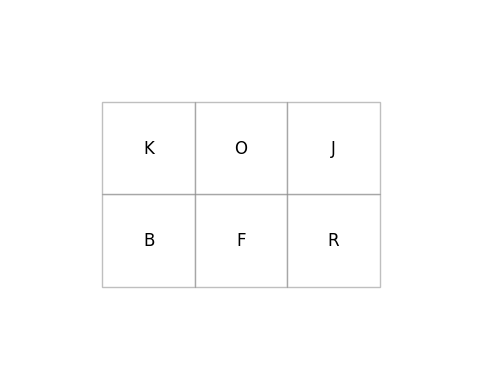

In [4]:
n, m, height, shuffle = 2, 2, 5, True
example_data_1D = {
    "brick_layout": ["J,E,F,N,V,S,H,I,M,R"],
    "brick_colors": ["blue,yellow,yellow,white,white,blue,yellow,yellow,blue,blue"]
}

example_data_2D = {
    "brick_layout": ["B,K", "F,O", "R,J"],
    "brick_colors": ["white,blue", "yellow,white", "yellow,blue"]
}
# def build_bricks(n, m, height, shuffle):

bricks = ''
bricks = rebuild_bricks(example_data_2D)
draw_bricks(bricks, "bricks_1D.png", show=1, save=0, color=0)   

In [5]:
get_metrical_description(bricks)

'Brick B is at position (0, 0). Brick K is at position (0, 1). Brick F is at position (1, 0). Brick O is at position (1, 1). Brick R is at position (2, 0). Brick J is at position (2, 1).'

In [46]:
# Recreating bricks and drawing them with gaps

dim = 2
N = 50
res_dir = f'../data/brick_2D_50/'
image_dir = 'images'
image_dir = os.path.join(res_dir, image_dir)
open_path = os.path.join(res_dir, 'data.json')
os.makedirs(image_dir, exist_ok=True)

with open(open_path, 'r') as f:
    data = json.load(f)
    color = 0
    if color:
        cstring = 'color'
    else:
        cstring = 'bw'
    for i, row in enumerate(data):
        bricks = rebuild_bricks(row)
        img_name = os.path.join(image_dir, f"img_{i}_{cstring}_gap.png")
        draw_bricks(bricks, img_name, show=0, save=0, color=color, hgap=1)

In [59]:
# Recreating bricks and generating metrical descriptions
dim = 2
N = 50
res_dir = f'../data/brick_{dim}D_50/'
open_path = os.path.join(res_dir, 'data.json')
save_path = os.path.join(res_dir, 'data_metrical_descriptions.json')

res_data = []
with open(open_path, 'r') as f:
    data = json.load(f)
    for i, row in enumerate(data):
        bricks = rebuild_bricks(row)
        desc = get_metrical_description(bricks)
        target = row['target']
        metrical_desc = f'There is a set of bricks. {desc} Now we have to get a specific brick. The bricks must now be grabbed from top to bottom, and if the lower brick is to be grabbed, the upper brick must be removed first. How to get brick {target}?'
        row['metrical_description'] = metrical_desc
        res_data.append(row)
        

with open(save_path, 'w') as outfile:
    json.dump(res_data, outfile)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [81]:
import numpy as np

# Recreating bricks for gap ablation study
dim = 2
N = 50
res_dir = f'../data/brick_{dim}D_50/'
image_dir = 'images/ablation'
image_dir = os.path.join(res_dir, image_dir)
image_dir_hori = os.path.join(image_dir, 'horizontal')
image_dir_vert = os.path.join(image_dir, 'vertical')
image_dir_both = os.path.join(image_dir, 'both')
open_path = os.path.join(res_dir, 'data.json')
os.makedirs(image_dir_hori, exist_ok=True)
os.makedirs(image_dir_vert, exist_ok=True)
os.makedirs(image_dir_both, exist_ok=True)

with open(open_path, 'r') as f:
    data = json.load(f)
    color = 0
    for i, row in enumerate(data):
        bricks = rebuild_bricks(row)
        for g in np.arange(0.1, 1.1, 0.1):
            g = g.round(1)
            img_name = os.path.join(image_dir_hori, f"img_{i}_{g}.png")
            draw_bricks(bricks, img_name, show=0, save=1, hgap=g)
            img_name = os.path.join(image_dir_vert, f"img_{i}_{g}.png")
            draw_bricks(bricks, img_name, show=0, save=1, vgap=g)
            img_name = os.path.join(image_dir_both, f"img_{i}_{g}.png")
            draw_bricks(bricks, img_name, show=0, save=1, hgap=g, vgap=g)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f38a7b54c90>>
Traceback (most recent call last):
  File "/home/imajic/pcloud/01_Projects/2024_SIGSPATIAL/llm_modality_reasoning/venv_sigspatial/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [6]:
import numpy as np

# Recreating bricks for gap ablation study where
# hs = vs + 0.3 or hs = vs * 2
dim = 2
N = 50
res_dir = f'../data/brick_{dim}D_50/'
image_dir = 'images/ablation_2'
image_dir = os.path.join(res_dir, image_dir)
# image_dir_1 = os.path.join(image_dir, 'vs_plus_03')
# image_dir_2 = os.path.join(image_dir, 'vs_times_2')
image_dir_2 = os.path.join(image_dir, 'vs_times_4')
open_path = os.path.join(res_dir, 'data.json')
os.makedirs(image_dir_1, exist_ok=True)
os.makedirs(image_dir_2, exist_ok=True)

with open(open_path, 'r') as f:
    data = json.load(f)
    color = 0
    for i, row in enumerate(data):
        bricks = rebuild_bricks(row)
        for g in np.arange(0.0, 1.0, 0.1):
            g = g.round(1)
            # img_name = os.path.join(image_dir_1, f"img_{i}_{g}.png")
            # draw_bricks(bricks, img_name, show=0, save=1, vgap=g, hgap=g+0.3)
            # img_name = os.path.join(image_dir_2, f"img_{i}_{g}.png")
            # draw_bricks(bricks, img_name, show=0, save=1, vgap=g, hgap=g*2)
            img_name = os.path.join(image_dir_2, f"img_{i}_{g}.png")
            draw_bricks(bricks, img_name, show=0, save=1, vgap=g, hgap=g*4)

In [ ]:
f'There is a set of bricks. {metrical_desc} Now we have to get a specific brick. The bricks must now be grabbed from top to bottom, and if the lower brick is to be grabbed, the upper brick must be removed first. How to get brick {row.target}?'
